# Auto - MPG - Regressor

## In this project, our aim is to develop a predictive model using various regression techniques to estimate the miles per gallon (mpg) of vehicles. This model will leverage a range of features to accurately predict fuel efficiency

The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes

Features include:
1. mpg: mile per gallon (target feature)
2. cylinders: number of cylinders
3. displacement: the amount of air its engine can move
4. horsepower: the power produced
5. weight: weight of the car
6. acceleration: acceleration of car
7. model year: manufacturing year of the car
8. origin: manufacturing location of the car
9. car name: name of the car, string (unique for each instance)

## Import libraries

In [1]:
import numpy as np                                     # linear alegbra
import pandas as pd                                    # data processing
import seaborn as sns                                  # ploting graphs
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder         # converting categorical to numerical
from sklearn.preprocessing import StandardScaler       # scaling
from sklearn.model_selection import train_test_split   # spiltting the data
from sklearn.linear_model import LinearRegression      # model building algorithms

from sklearn.metrics import r2_score, mean_squared_error  # evaluation

from sklearn.linear_model import Ridge, Lasso          # tuning

import warnings                                        # for ingore warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",None)              # display all columns


Bad key text.latex.preview in file C:\Users\vinay\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\vinay\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\vinay\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

### Load and display the dataset

#### Since the Auto MPG dataset is available in the Seaborn library, we will load it from there

In [2]:
mpg_df = sns.load_dataset('mpg')
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
mpg = pd.DataFrame.copy(mpg_df)                                # create a copy of orginal dataset and work with copy one

## EDA

In [4]:
# to check basic info of datasets
print(mpg.shape)
mpg.info()

(398, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
# to check basic summary of the data
mpg.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,NaN,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,NaN,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,NaN,NaN


In [6]:
# droping name variable since
mpg.drop('name',inplace=True,axis=1)

In [7]:
print(mpg.shape)
mpg.head()

(398, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [8]:
# To check if there are any special characters in place of values
for i in mpg.columns:
    print({i:mpg[i].unique()})

{'mpg': array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])}
{'cylinders': array([8, 4, 6, 3, 5], dtype=int64)}
{'displacement': array([307. , 350. , 318. , 304. , 302. , 429. , 454. , 440. , 4

In [9]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [10]:
mpg.duplicated().sum()

0

##### Treating missing value.

In [11]:
mpg.horsepower.fillna(mpg.horsepower.median(), inplace=True)
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

##### Inference : 
1. The dataset consists of 9 fields and 398 records.
2. The dataset does not contain duplicate values or special characters.
3. However, it does contain a few null values (missing values), which were imputed using the 'fillna' method.
4. The 'name' column has been dropped due to its high cardinality (305 unique values).

#### Converting categorical(obj) varibles to numerical(int) varibles

In [12]:
#segregate categorical variables

mpg_obj = []                                         # counter

for i in mpg:
    if mpg[i].dtype=="object":
        mpg_obj.append(i)
        
mpg_obj

['origin']

In [13]:
le=LabelEncoder()
 
for x in mpg_obj:
    mpg[x]=le.fit_transform(mpg[x])

In [14]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('Feature', x)
print('mapping', le_name_mapping)

Feature origin
mapping {'europe': 0, 'japan': 1, 'usa': 2}


In [15]:
print(mpg.shape)
mpg.head()

(398, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,2
1,15.0,8,350.0,165.0,3693,11.5,70,2
2,18.0,8,318.0,150.0,3436,11.0,70,2
3,16.0,8,304.0,150.0,3433,12.0,70,2
4,17.0,8,302.0,140.0,3449,10.5,70,2


## Data visualization

##### Checking for assumption

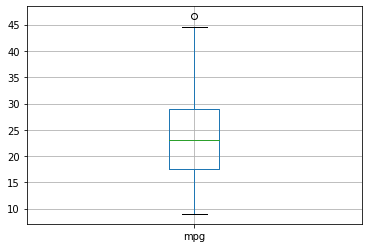

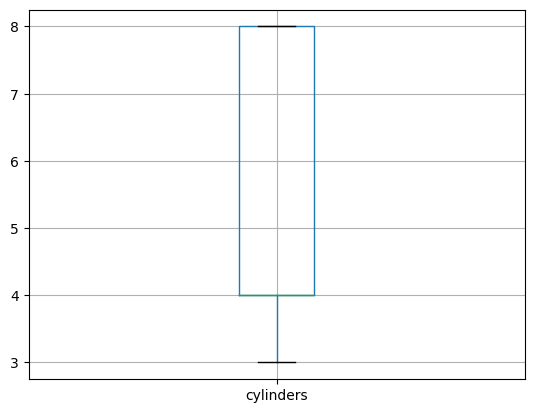

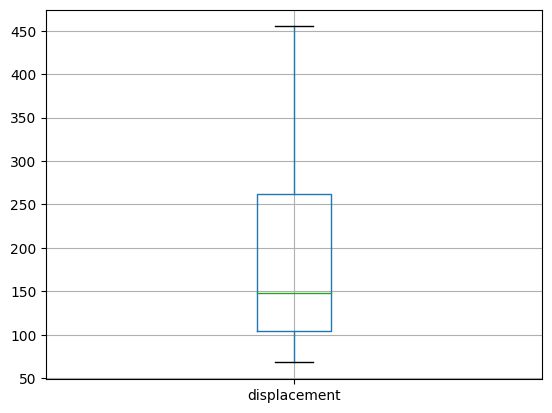

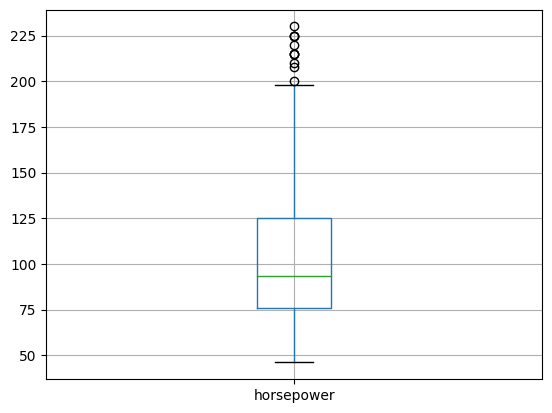

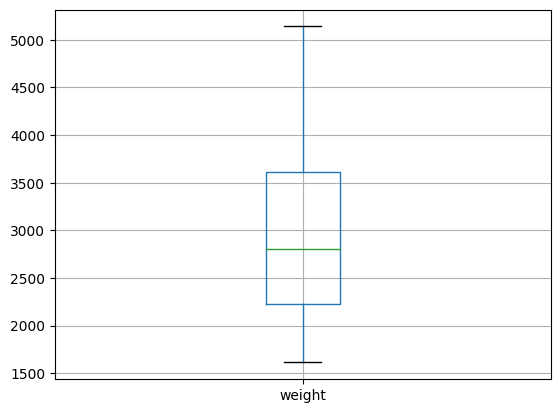

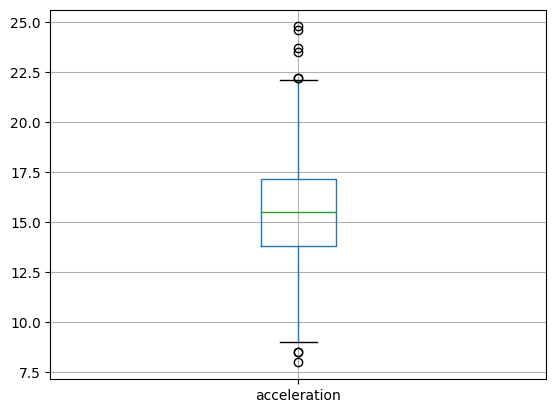

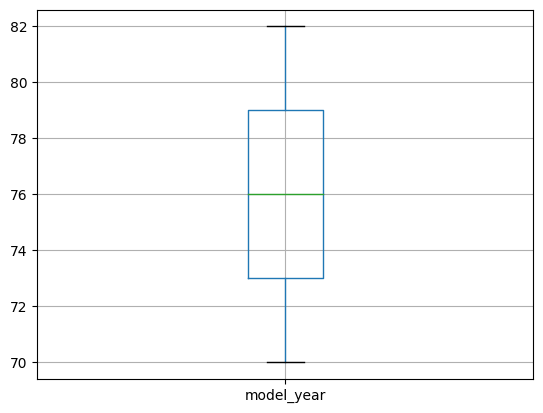

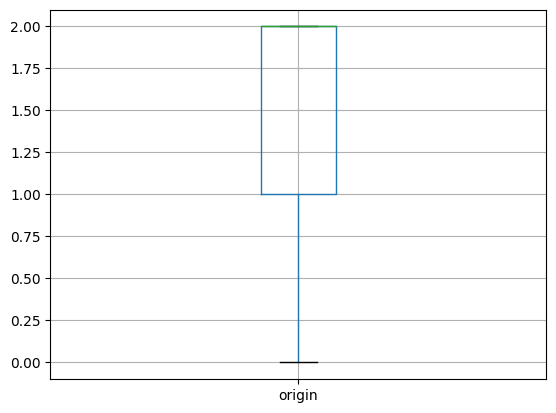

In [16]:
#Assumption 1: There should be no outliers in the data using using box plot

for i in mpg.columns:
    mpg.boxplot(column=i)
    plt.show()

In [20]:
hp_q1 = mpg['horsepower'].quantile(0.25) #first quartile value
hp_q3 = mpg['horsepower'].quantile(0.75) # third quartile value
hp_iqr = hp_q3-hp_q1 #Interquartile range
hp_low  = hp_q1-1.5*hp_iqr #acceptable range
hp_high = hp_q3+1.5*hp_iqr #acceptable range

hp_include = mpg.loc[(mpg['horsepower'] >= hp_low) & 
                     (mpg['horsepower'] <= hp_high)] # meeting the acceptable range
hp_exclude = mpg.loc[(mpg['horsepower'] < hp_low) | 
                     (mpg['horsepower'] > hp_high)] #not meeting the acceptable range

print("First Quartile: ",hp_q1)
print("Third Quartile: ",hp_q3)
print("Interquartile: ",hp_iqr)
print("--------------------------")
print(hp_include.shape)
print(hp_exclude.shape)

First Quartile:  76.0
Third Quartile:  125.0
Interquartile:  49.0
--------------------------
(387, 8)
(11, 8)


In [23]:
#capping approach

hp_exclude.loc[hp_exclude["horsepower"] <hp_low, "horsepower"] = hp_low
hp_exclude.loc[hp_exclude["horsepower"] >hp_high, "horsepower"] = hp_high

In [24]:
#getting back the original shape of df
mpg_new = pd.concat([hp_include,hp_exclude],axis=0) #concatenating both dfs to get 
#the original shape
mpg_new.shape

(398, 8)

In [25]:
acc_q1 = mpg_new['acceleration'].quantile(0.25) #first quartile value
acc_q3 = mpg_new['acceleration'].quantile(0.75) # third quartile value
acc_iqr = acc_q3-acc_q1 #Interquartile range
acc_low  = acc_q1-1.5*acc_iqr #acceptable range
acc_high = acc_q3+1.5*acc_iqr #acceptable range

acc_include = mpg.loc[(mpg['acceleration'] >= acc_low) & 
                     (mpg['acceleration'] <= acc_high)] # meeting the acceptable range
acc_exclude = mpg.loc[(mpg['acceleration'] < acc_low) | 
                     (mpg['acceleration'] > acc_high)] #not meeting the acceptable range

print("First Quartile: ",acc_q1)
print("Third Quartile: ",acc_q3)
print("Interquartile: ",acc_iqr)
print("--------------------------")
print(acc_include.shape)
print(acc_exclude.shape)

First Quartile:  13.825000000000001
Third Quartile:  17.174999999999997
Interquartile:  3.349999999999996
--------------------------
(389, 8)
(9, 8)


In [26]:
#capping approach

acc_exclude.loc[acc_exclude["acceleration"] <acc_low, "acceleration"] = acc_low
acc_exclude.loc[acc_exclude["acceleration"] >acc_high, "acceleration"] = acc_high

In [27]:
#getting back the original shape of df
mpg_new = pd.concat([acc_include,acc_exclude],axis=0) #concatenating both dfs to get 
#the original shape
mpg_new.shape

(398, 8)

There are a few outliers in horsepower and acceleration, and are handled using capping approach.

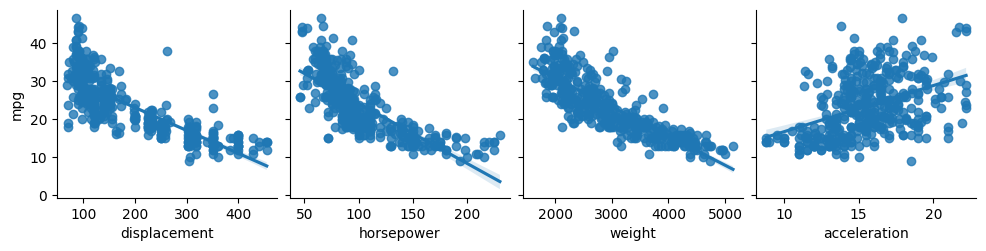

In [31]:
#Assumption 2: Assumption of linearity - Every ind var should have a linear relationship with the dep var.

sns.pairplot(data=mpg_new,x_vars=['displacement','horsepower','weight','acceleration'],
             y_vars=['mpg'],kind='reg')

We can observe that the displacement, horsepower, and weight variables exhibit a strong negative linear relationship with mpg. Where acceleration also shows linearity, but its direction and strength are positive and moderate, respectively.

In [32]:
#Assumption 3: Assumption of Normailty - The dependent variable should follow an Approximate normal distribution
#Spiltting the data into independent and target variable.

x=mpg_new.iloc[:,1:]
y=mpg_new.iloc[:,0]

In [33]:
print(x.shape)
print(y.shape)

(398, 7)
(398,)


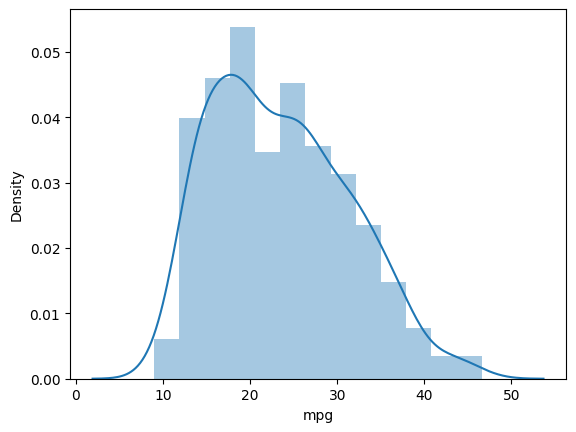

In [34]:
# using distribution plot

sns.distplot(y,hist=True)
plt.show()

Since the dependent variable appears to be slightly right-skewed, we will attempt a log transformation to reduce its skewness.

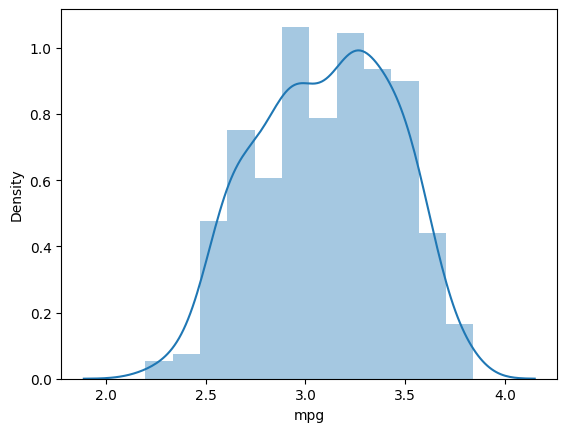

In [35]:
# log transformation

y_log = np.log(y)
sns.distplot(y_log)
plt.show()

array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>],
       [<AxesSubplot:title={'center':'model_year'}>,
        <AxesSubplot:title={'center':'origin'}>, <AxesSubplot:>]],
      dtype=object)

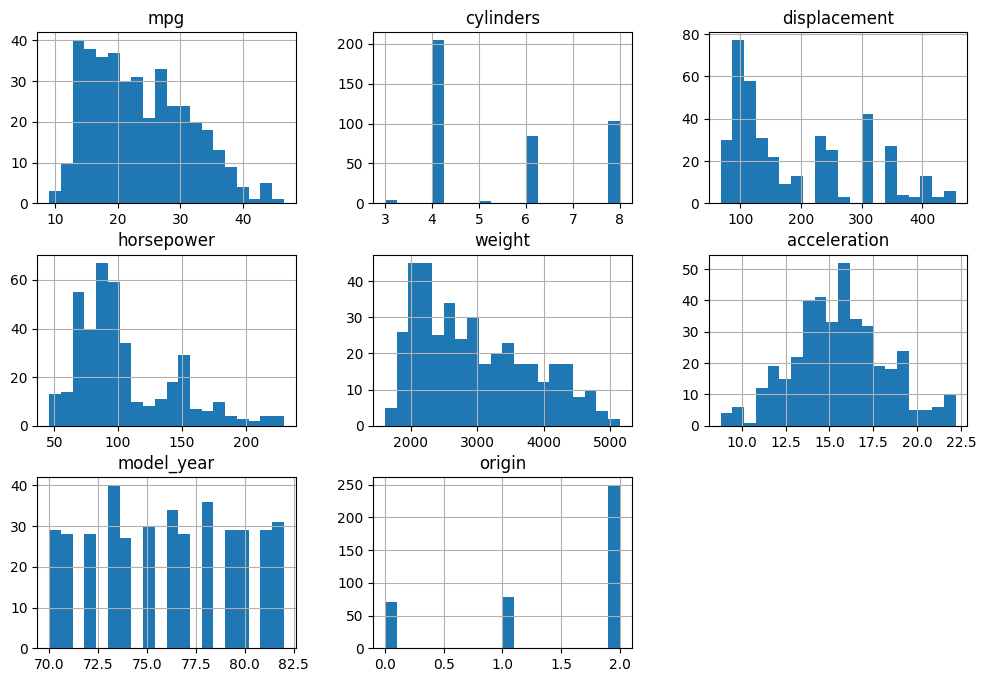

In [36]:
mpg_new.hist(bins=20, figsize=(12, 8))

Checking and handling the skewness in the independent variables.

In [37]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = x.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)

cylinders       0.524934
displacement    0.716930
horsepower      1.102051
weight          0.529059
acceleration    0.163244
model_year      0.011491
origin         -0.969538
dtype: float64
horsepower    1.102051
origin       -0.969538
dtype: float64


As we can see, horsepower and origin exhibit high skewness. However, for domain-specific reasons, we will keep them and apply a log transformation for further model building

In [38]:
# apply log + 1 transformation for all numeric features with skewness over .75
x[data_num_skewed.index] = np.log1p(x[data_num_skewed.index])

              cylinders  displacement  horsepower    weight  acceleration  \
cylinders      1.000000      0.950721    0.840812  0.896017     -0.509344   
displacement   0.950721      1.000000    0.884507  0.932824     -0.548667   
horsepower     0.840812      0.884507    1.000000  0.873699     -0.697480   
weight         0.896017      0.932824    0.873699  1.000000     -0.422492   
acceleration  -0.509344     -0.548667   -0.697480 -0.422492      1.000000   
model_year    -0.348746     -0.370164   -0.394020 -0.306564      0.287122   
origin         0.513476      0.549329    0.440640  0.476069     -0.240794   

              model_year    origin  
cylinders      -0.348746  0.513476  
displacement   -0.370164  0.549329  
horsepower     -0.394020  0.440640  
weight         -0.306564  0.476069  
acceleration    0.287122 -0.240794  
model_year      1.000000 -0.050901  
origin         -0.050901  1.000000  


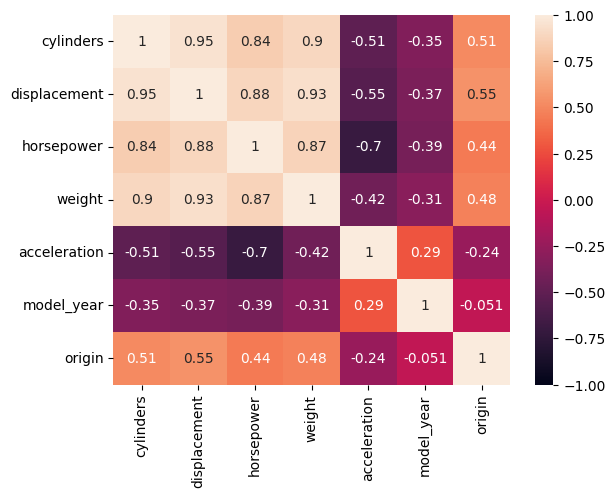

In [39]:
#Assumption 4: Assumption of no multicolinearity: There should be no multicolinearity between the independent variables

corr_df = x.corr(method='pearson')
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

We can see there are no highly correlated variables. But displacement and weight have high corelation with cylinder, but for domain pov will keep them. 

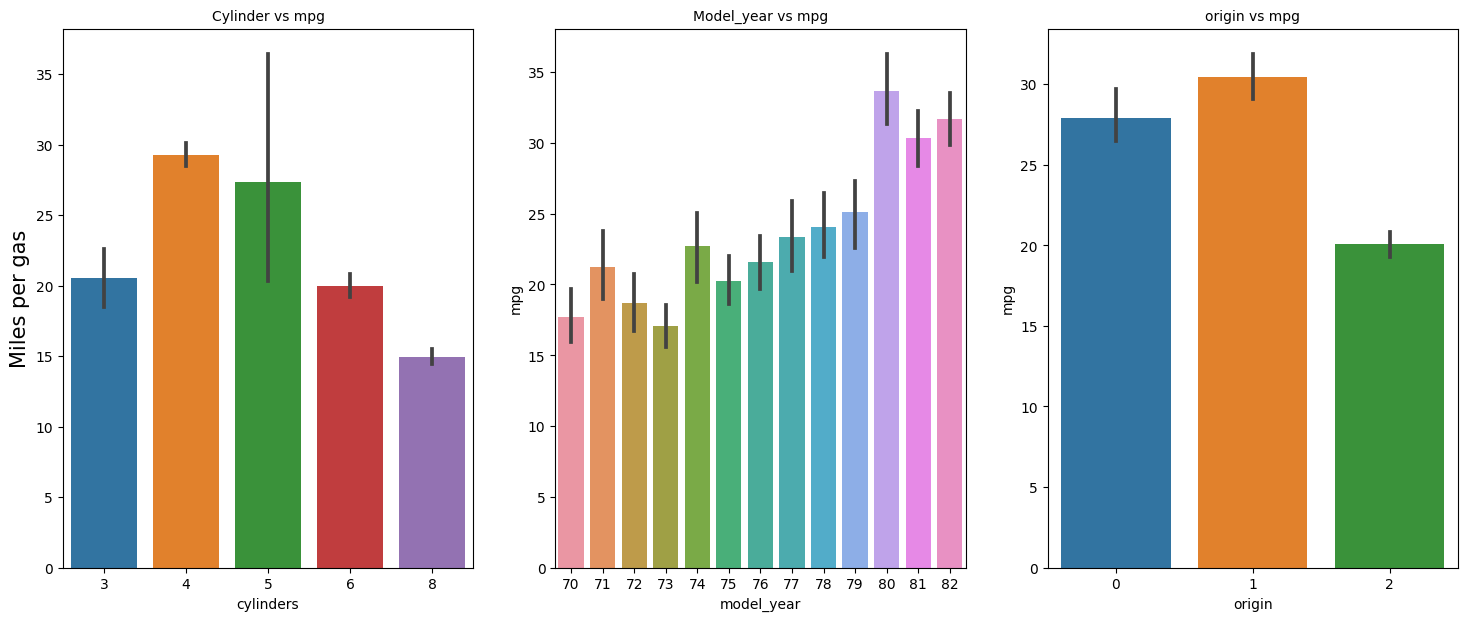

In [41]:
plt.figure(figsize=(18,7))
plt.subplot(131)
sns.barplot(data=mpg_new,x='cylinders',y='mpg')
plt.title('Cylinder vs mpg',size = 10)
plt.ylabel("Miles per gas",size=15)

plt.subplot(132)
sns.barplot(data=mpg_new,x='model_year',y='mpg')
plt.title('Model_year vs mpg',size = 10)

plt.subplot(133)
sns.barplot(data=mpg_new,x='origin',y='mpg')
plt.title('origin vs mpg',size = 10)

plt.show()

We can see that cars with 4 or 5 cylinders offer higher mileage, whereas cars with 8 cylinders provide the lowest mileage. Additionally, models that were bought recently and those from Japan tend to offer better mileage compared to older ones.

##### Scaling

In [42]:
scaler = StandardScaler()                               
scaler.fit(x)                                           #training on data
x=scaler.transform(x)                                   #transforming the data

print(x)

[[ 1.49819126  1.0906037   0.82284623 ... -1.32059529 -1.62742629
   0.66384089]
 [ 1.49819126  1.5035143   1.52543016 ... -1.50648937 -1.62742629
   0.66384089]
 [ 1.49819126  1.19623199  1.24442102 ... -1.69238346 -1.62742629
   0.66384089]
 ...
 [ 1.49819126  0.6392828  -0.25818504 ...  2.47164397  0.80963097
   0.66384089]
 [-0.85632057 -0.99315448 -2.09494398 ...  2.47164397  1.08041511
  -2.0007201 ]
 [-0.85632057 -0.92593647 -1.86210987 ...  2.47164397  1.62198339
  -2.0007201 ]]


#### Splitting the data : Trainig and Validation (Testing)

In [43]:
#split the data into test and train

x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print("Percentage of train data",x_train.shape[0]/x.shape[0]*100)

(318, 7)
(318,)
(80, 7)
(80,)
Percentage of train data 79.89949748743719


In [45]:
lr = LinearRegression()                                            # create a model object

lr.fit(x_train,y_train)                                            # train the model obj

print(lr.intercept_)                                               # print intercept and  coefficients
print(lr.coef_)

23.502163017007895
[-0.37036365  2.04032243 -2.88813019 -4.60557764 -0.58256517  2.72175177
 -0.8963412 ]


We can conclude from this best-fit line that the 3rd and 4th coefficients, i.e., horsepower and weight, have a strong negative impact on mpg. In other words, as the horsepower and weight increase, the mpg decreases

In [46]:
y_pred=lr.predict(x_test)                                           # predict using model

print(y_pred)
len(y_pred)

[29.04371529 14.39578697 29.97887504 22.35946152 22.17529979 34.92722164
 12.69634187 26.4149687  26.83726792 26.12283692 20.21590625 21.92164194
 27.28599209 31.14224673  6.66020411 25.6705117  22.57916963 10.6758439
 23.43528586 33.58004662 26.09961476 24.83912253 28.27572499 19.66314193
 34.16288333 31.96763786 33.22148699 22.14519459 28.24518093 34.59761249
 13.52775356 10.0550895  15.29953356 24.26450153 29.67143134 25.24378268
 31.37019399 16.97042468 12.36412298 30.62880626 23.91012999 12.8391533
 10.59294825 11.98385875 31.17659616 17.65922476 24.09479079 24.86686596
 32.65884341 19.49533941 21.21144372 14.87116334 28.11882923 32.28919863
 35.35049201 20.11837502 29.50741713 12.15427811 24.31571132 15.76099842
 12.96529586 17.25534225 31.37901091 19.93182752 20.564752   26.88124467
 24.70984093 15.42922132 20.56001199 22.1452276  20.76197047 28.05168799
  9.88773198 10.12249938 29.64576038 31.80986384 21.85479471 24.81277654
 10.69570718 23.0887905 ]


80

### Evaluation

In [47]:
lr.score(x_train,y_train)

0.8223707688929248

In [48]:
r2 = r2_score(y_test,y_pred)
print("R-squared:",round(r2*100,2))

print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",round(adjusted_r_squared*100,2))

R-squared: 85.31
RMSE: 2.88
Adj R-square: 85.05


Using linear regression, the R-squared value is 85.31%, and the adjusted R-squared value is 85.05%. Despite the good performance, we will still tune the model to explore the potential for further improvement 

### Tuning
1. Ridge – It identifies insignificant variables in the models and reduces that beta(B) variables such that overall impact of these variables on model is reduce
2. Lasso - It identifies insignificant variables in the models and forces that beta(B) parameter be zeros such that overall impact of these variables on model is eliminated.

In [49]:
#ridge
r=Ridge()
r.fit(x_train,y_train)

print(r.intercept_)
print(r.coef_)

23.502674875513744
[-0.31226252  1.78797771 -2.88615154 -4.4399676  -0.60777588  2.70028962
 -0.87056214]


In [50]:
y_pred_r = r.predict(x_test) 

r2 = r2_score(y_test,y_pred_r)
print("R-squared:",round(r2*100,2))

print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred_r)),2))
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",round(adjusted_r_squared*100,2))

R-squared: 85.39
RMSE: 2.87
Adj R-square: 85.13


In [51]:
#lasso
la = Lasso()
la.fit(x_train,y_train)

print(la.intercept_)
print(la.coef_)

23.553097975915342
[-0.         -0.         -1.5492634  -3.66037779  0.          1.79624437
 -0.        ]


In [52]:
y_pred_l = la.predict(x_test)
 
r2 = r2_score(y_test,y_pred_l)
print("R-squared:",round(r2*100,2))

print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred_l)),2))
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",round(adjusted_r_squared*100,2))

R-squared: 82.72
RMSE: 3.13
Adj R-square: 82.41


We can see that there is minute change in R-square of ridge model with respect to original model, whereas lasso elimated many variables and it's R-Square is least among all the models.

In [58]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [59]:
import xgboost as xgb

In [63]:
xgb_model=xgb.XGBRegressor(objective="reg:linear",max_depth=5,min_child_weight=4,
                          subsample=0.7,n_estimators=1000,learning_rate=0.07)
xgb_model.fit(x_train,y_train)

[17:55:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.07, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [64]:
y_pred_x = xgb_model.predict(x_test) 

r2 = r2_score(y_test,y_pred_x)
print("R-squared:",round(r2*100,2))

print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred_x)),2))
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",round(adjusted_r_squared*100,2))

R-squared: 90.34
RMSE: 2.34
Adj R-square: 90.17


Among all the models evaluated, the XGBoost Regressor demonstrates superior performance. Therefore, we will use this model for predicting future unseen data.